In [6]:
import pandas as cla_imbps
cla_imb = cla_imbps.read_csv('ppcess_drug200.csv')
cla_imb

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [7]:
cla_imb['Drug'].value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

In [8]:
cla_imb_XP = cla_imb.drop('Drug',axis=1)
cla_imb_YQ = cla_imb['Drug']

In [9]:
cla_imb_XP

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [10]:
cla_imb_YQ

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [11]:
import imblearn
from imblearn.over_sampling import SMOTE as cla_ste
from collections import Counter as cla_cnt

cla_imb_YQ = cla_imb['Drug']

print('Actual Data   :  %s' % cla_cnt(cla_imb_YQ))
cla_smote = cla_ste()
cla_imb_XP, cla_imb_YQ = cla_smote.fit_resample(cla_imb_XP, cla_imb_YQ)
print('Balanced Data : %s' % cla_cnt(cla_imb_YQ))

Actual Data   :  Counter({4: 91, 3: 54, 0: 23, 2: 16, 1: 16})
Balanced Data : Counter({4: 91, 2: 91, 3: 91, 0: 91, 1: 91})


In [12]:
from sklearn.model_selection import train_test_split as cla_imbns
import warnings as cla_imbng
cla_imbng.filterwarnings("ignore")

In [13]:
cla_rs=36
cla_ti=0.4
cla_ti1=0.5

# ::::train data--60%::::
cla_imb_XPtr, cla_imb_XPte, cla_imb_YQtr, cla_imb_YQte = cla_imbns(cla_imb_XP, cla_imb_YQ, test_size=cla_ti, random_state= cla_rs)
# ::::test,validation---20% & 20%
cla_imb_XPva, cla_imb_XPte, cla_imb_YQva, cla_imb_YQte = cla_imbns(cla_imb_XPte, cla_imb_YQte, test_size=cla_ti1, random_state= cla_rs)

print("Training data    :", cla_imb_XPtr.shape)
print("Testing data     :", cla_imb_XPte.shape)
print("Validation data  :", cla_imb_XPva.shape)

Training data    : (273, 5)
Testing data     : (91, 5)
Validation data  : (91, 5)


### Tree based algorithm

In [14]:
from sklearn.metrics import classification_report as cla_imbcfc
from sklearn.metrics import confusion_matrix as cla_imbcom
from sklearn.metrics import ConfusionMatrixDisplay as cla_imbcmdi
from sklearn.model_selection import GridSearchCV as cla_imbgdrc
import time as cla_imbttim

#### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier as hosp_mrt_dte

In [16]:
cladt_prm_gid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
cladt_gsh = cla_imbgdrc(estimator=hosp_mrt_dte(), param_grid=cladt_prm_gid, cv=5)
cladt_gsh.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cladt_gsh.best_params_)
cladt_mdl = cladt_gsh.best_estimator_

Best Parameter {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

**************confusion matrix for validation data*****************


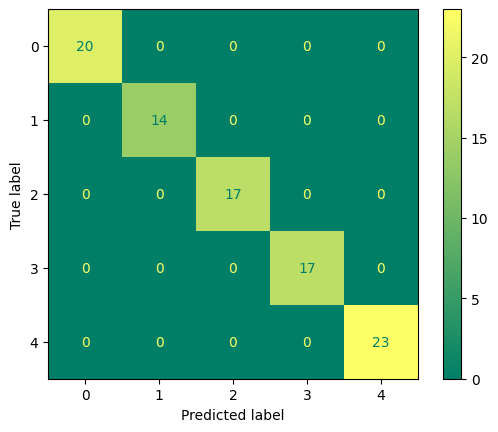

In [17]:

drug_pdt_val = cladt_mdl.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')


**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.96        13
           3       1.00      0.91      0.95        23
           4       0.95      1.00      0.97        19

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91

**************confusion matrix for testing data*****************


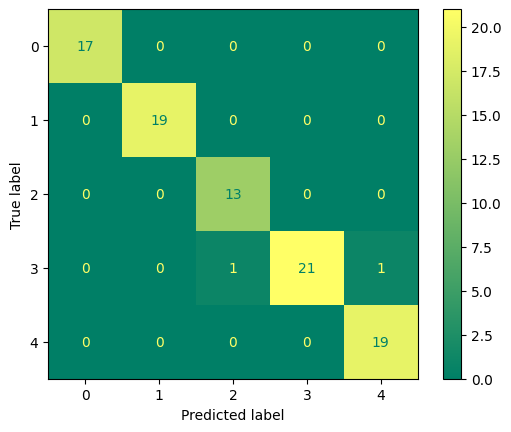

In [18]:

drug_pred_test = cladt_mdl.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

#### Extra Trees Classifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier as hosp_mrt_extr

In [20]:

clapm_gid_et = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
cla_gid_sh_et = cla_imbgdrc(estimator=hosp_mrt_extr(), param_grid=clapm_gid_et, cv=5)
cla_gid_sh_et.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_gid_sh_et.best_params_)
cla_et_mod = cla_gid_sh_et.best_estimator_

Best Parameter {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        23

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

**************confusion matrix for validation data*****************


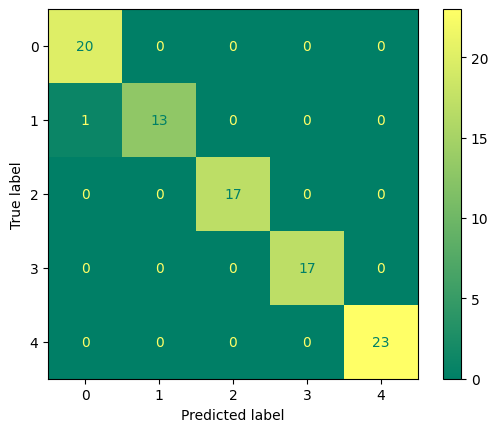

In [21]:

drug_pdt_val = cla_et_mod.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.96        13
           3       1.00      0.96      0.98        23
           4       1.00      1.00      1.00        19

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

**************confusion matrix for testing data*****************


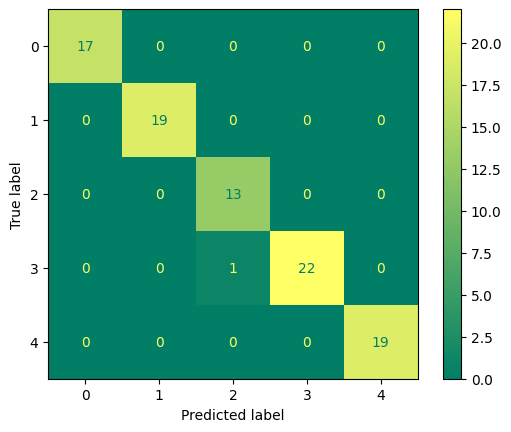

In [22]:

drug_pred_test = cla_et_mod.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

### Ensemble methods

#### AdaBoost Classifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier as hosp_mrt_adst

In [24]:
clapam_gid_ab = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
cla_gid_sh_ab = cla_imbgdrc(estimator=hosp_mrt_adst(), param_grid=clapam_gid_ab, cv=5)
cla_gid_sh_ab.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_gid_sh_ab.best_params_)
cla_ab_modl = cla_gid_sh_ab.best_estimator_

Best Parameter {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.41      1.00      0.58        14
           2       0.50      1.00      0.67        17
           3       0.00      0.00      0.00        17
           4       1.00      1.00      1.00        23

    accuracy                           0.59        91
   macro avg       0.38      0.60      0.45        91
weighted avg       0.41      0.59      0.47        91

**************confusion matrix for validation data*****************


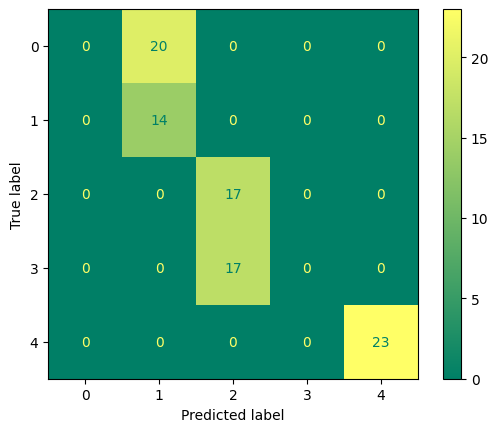

In [25]:

drug_pdt_val = cla_ab_modl.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.53      1.00      0.69        19
           2       0.37      1.00      0.54        13
           3       0.00      0.00      0.00        23
           4       0.95      1.00      0.97        19

    accuracy                           0.56        91
   macro avg       0.37      0.60      0.44        91
weighted avg       0.36      0.56      0.43        91

**************confusion matrix for testing data*****************


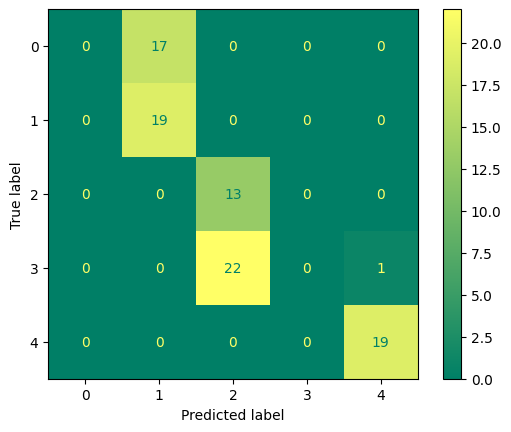

In [26]:

drug_pred_test = cla_ab_modl.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

#### Bagging Classifier

In [27]:
from sklearn.ensemble import BaggingClassifier as hosp_mrt_bags

In [28]:
cla_pam_gid_bg = {
    'n_estimators': [10, 50],
    'max_samples': [0.5, 0.8],
    'max_features': [0.5, 0.8],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
cla_gid_sh_bg = cla_imbgdrc(estimator=hosp_mrt_bags(), param_grid=cla_pam_gid_bg, cv=5)
cla_gid_sh_bg.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_gid_sh_bg.best_params_)
clabg_mdl = cla_gid_sh_bg.best_estimator_

Best Parameter {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 0.5, 'n_estimators': 50}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

**************confusion matrix for validation data*****************


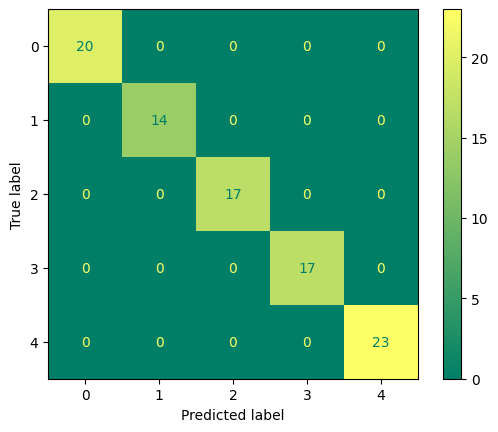

In [29]:

drug_pdt_val = clabg_mdl.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.96        13
           3       1.00      0.96      0.98        23
           4       1.00      1.00      1.00        19

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

**************confusion matrix for testing data*****************


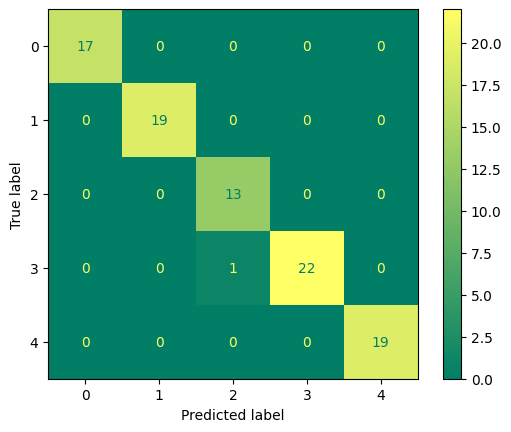

In [30]:

drug_pred_test = clabg_mdl.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

### Naive Bayes classifiers

#### BernoulliNB

In [31]:
from sklearn.naive_bayes import BernoulliNB as hosp_mrt_beru

In [32]:
cla_pam_gid_bnb = {
    'alpha': [0.0, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}
cla_pam_gid_sh = cla_imbgdrc(estimator=hosp_mrt_beru(), param_grid=cla_pam_gid_bnb, cv=5)
cla_pam_gid_sh.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_pam_gid_sh.best_params_)
cla_bnb_mdl = cla_pam_gid_sh.best_estimator_

Best Parameter {'alpha': 0.0, 'fit_prior': True}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        20
           1       0.33      0.50      0.40        14
           2       0.53      1.00      0.69        17
           3       0.69      0.65      0.67        17
           4       0.00      0.00      0.00        23

    accuracy                           0.47        91
   macro avg       0.38      0.51      0.43        91
weighted avg       0.36      0.47      0.40        91

**************confusion matrix for validation data*****************


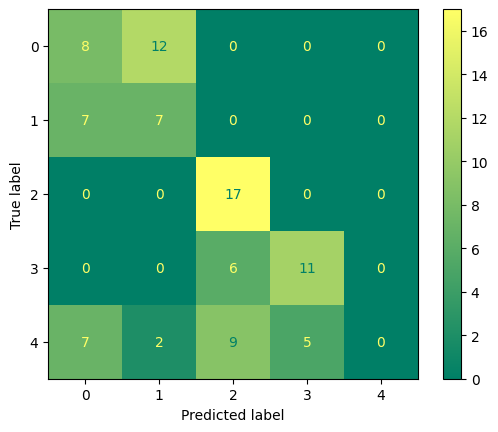

In [33]:

drug_pdt_val = cla_bnb_mdl.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       0.38      0.65      0.48        17
           1       0.38      0.26      0.31        19
           2       0.42      1.00      0.59        13
           3       0.61      0.48      0.54        23
           4       0.00      0.00      0.00        19

    accuracy                           0.44        91
   macro avg       0.36      0.48      0.38        91
weighted avg       0.37      0.44      0.37        91

**************confusion matrix for testing data*****************


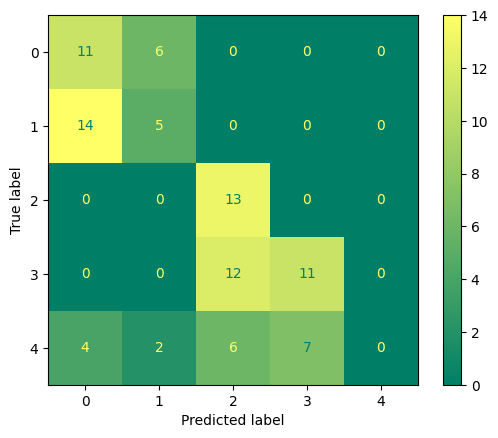

In [34]:

drug_pred_test = cla_bnb_mdl.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')

#### GaussianNB

In [35]:
from sklearn.naive_bayes import GaussianNB as hosp_mrt_gus

In [36]:
cla_pam_gid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
cla_pam_gid_sh = cla_imbgdrc(estimator=hosp_mrt_gus(), param_grid=cla_pam_gid, cv=5)
cla_pam_gid_sh.fit(cla_imb_XPtr, cla_imb_YQtr)
print("Best Parameter",cla_pam_gid_sh.best_params_)
mdl_gnb = cla_pam_gid_sh.best_estimator_

Best Parameter {'var_smoothing': 1e-06}


**************classification report for validation data*****************
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.88      1.00      0.93        14
           2       0.89      1.00      0.94        17
           3       1.00      1.00      1.00        17
           4       1.00      0.91      0.95        23

    accuracy                           0.96        91
   macro avg       0.95      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91

**************confusion matrix for validation data*****************


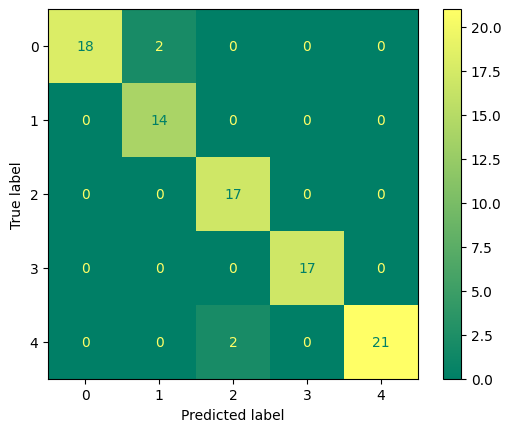

In [37]:

drug_pdt_val = mdl_gnb.predict(cla_imb_XPva)
print("**************classification report for validation data*****************")
print(cla_imbcfc(cla_imb_YQva, drug_pdt_val))
print("**************confusion matrix for validation data*****************")
cm_val = cla_imbcom(cla_imb_YQva, drug_pdt_val)
disp_val = cla_imbcmdi(confusion_matrix=cm_val, display_labels=[0, 1, 2, 3, 4])
disp_val.plot(cmap = 'summer')

**************classification report for testing data*****************
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.90      1.00      0.95        19
           2       0.93      1.00      0.96        13
           3       0.96      0.96      0.96        23
           4       1.00      0.95      0.97        19

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91

**************confusion matrix for testing data*****************


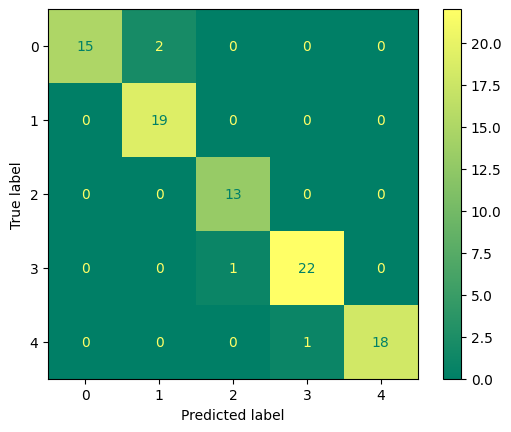

In [38]:

drug_pred_test = mdl_gnb.predict(cla_imb_XPte)
print("**************classification report for testing data*****************")
print(cla_imbcfc(cla_imb_YQte, drug_pred_test))
print("**************confusion matrix for testing data*****************")
cm_test = cla_imbcom(cla_imb_YQte, drug_pred_test)
disp_test = cla_imbcmdi(confusion_matrix=cm_test, display_labels=[0, 1, 2, 3, 4])
disp_test.plot(cmap = 'summer')